In [1]:
import numpy as np
import os
from astropy import units as u
from astropy import constants as const
import matplotlib.pyplot as plt

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/Isoscelestriangle2.svg/350px-Isoscelestriangle2.svg.png>

In [3]:
def mk_transit(duration, depth, ratio, time):
    
    # Make a transit from a trapezoid based on duration, depth, and radius ratio (planet/star)
    
    ab = duration * (1 - ratio) / 2
    bc = duration * ratio
    
    # Make x,y (time, flux) positions for each trap marker
    a = [0, 1]
    b = [ab, 1 - depth]
    c = [ab + bc, 1 - depth]
    d = [duration, 1]
    
    # Constuct the time points for a,b,c,d and add a sub-bin offset
    x = np.array([a[0], b[0], c[0], d[0]]) + np.random.uniform(0, time[2] - time[1])
    
    # Constuct the flux points for a,b,c,d
    y = [a[1], b[1], c[1], d[1]]
    
    # interpolate the trap at our time points and randomly roll the array to
    #    simulate a random t0.
    return np.roll(np.interp(time, x, y), np.random.randint(0, len(time)))

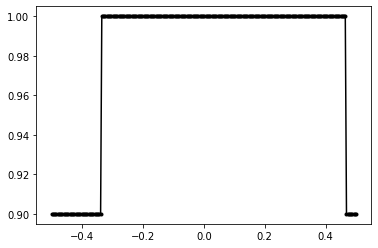

In [3]:
p = 1.0 # period [day]
time = np.linspace(-p/2, p/2, 256) # bin times [day]
d = 0.2 # duration [day]
de = 0.1 # depth [%]
ratio = 0.99991 # top bottom ratio

transit = mk_transit(d, de, ratio, time)

plt.figure()
plt.plot(time, transit, '-k')



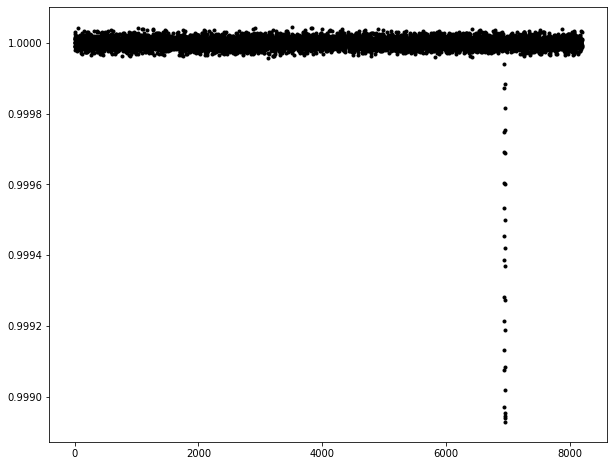

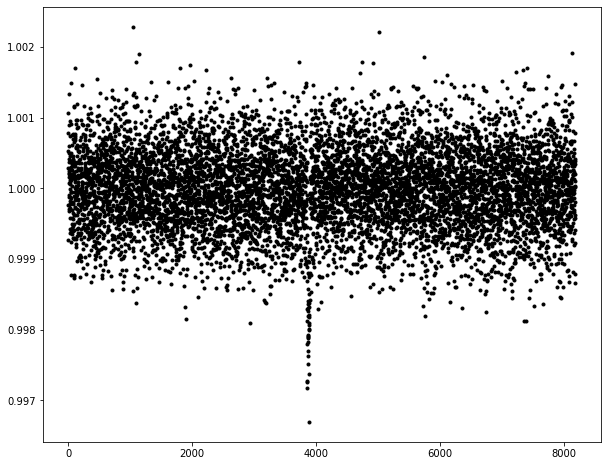

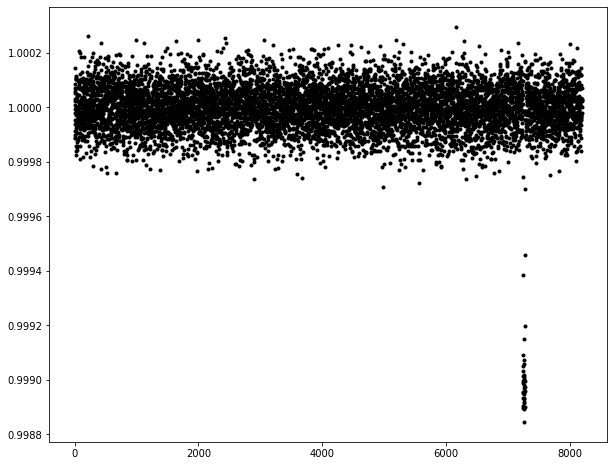

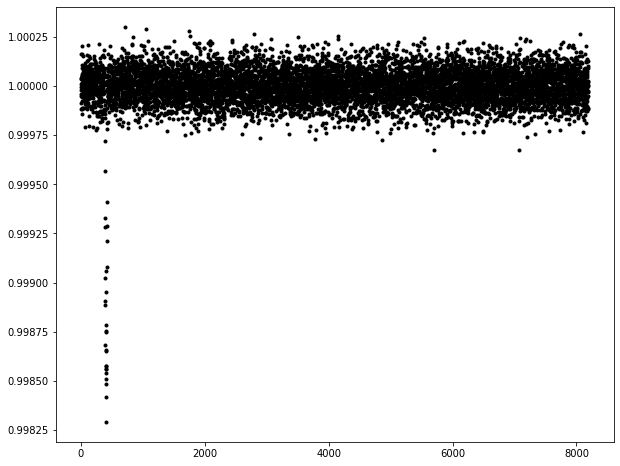

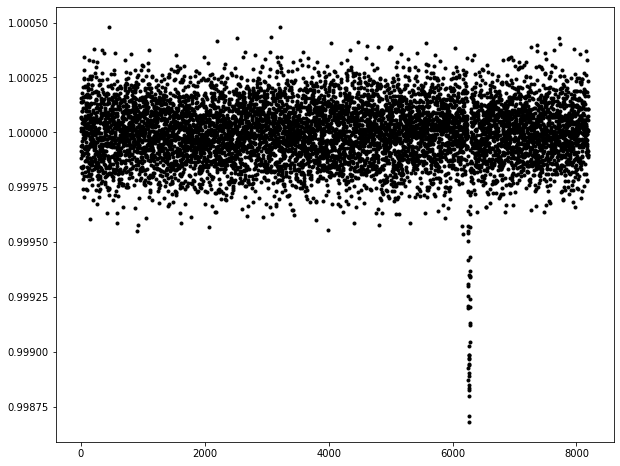

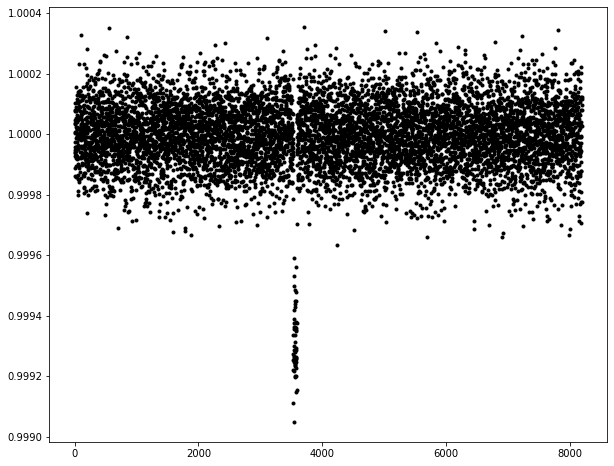

In [4]:
for i in range(20):
    noise_lvl_nobin = np.random.uniform(1, 8000) * 1e-6
    
#     p = np.random.uniform(5, 400)
    
#     p = np.random.uniform(60, 400)
    p = np.random.uniform(100, 200)

    d = np.random.uniform(0.000415, 0.0083) * p
#     d = np.random.uniform(0.0007, 0.01) * p
#     d = np.random.uniform(0.01, 0.08) * p
    
    noise_lvl = noise_lvl_nobin / (1500 / p)
#     noise_lvl = np.random.uniform(1, 800) * 1e-6
    
    min_de = noise_lvl * 1e6 * np.random.randint(3, 7)
    
    de = np.random.uniform(min_de, 1500) * 1e-6

    ratio = np.random.uniform(0.1, 1.0)
    
    time = np.linspace(-p/2, p/2, 8192)
    
    transits_clean = mk_transit(d, de, ratio, time)
    
    transits = transits_clean + np.random.normal(0.0, noise_lvl, len(time))
   

    plt.figure(figsize=(10, 8))

#     plt.plot(transits_clean, '-r')
    plt.plot(transits, '.k')
#         plt.plot(time, transits[i], '.k')
#         plt.plot(time, transits_clean[i, :], '.-r', alpha = 0.3) 
#    plt.title("Depth: " + str(de) + " | Duration: " + str(d) + " hours | Ratio: " + str(ratio) + " | Noise: " + str(noise_lvl)) 
#     plt.savefig('/media/rd3/cchen/cchen/kepler_ml_v3/training_figs/oct25/pos/' + str(i)+'.png')
    plt.show()
#         plt.close()
    

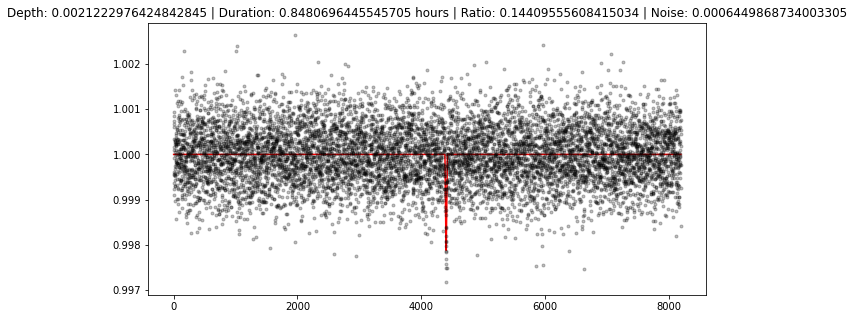

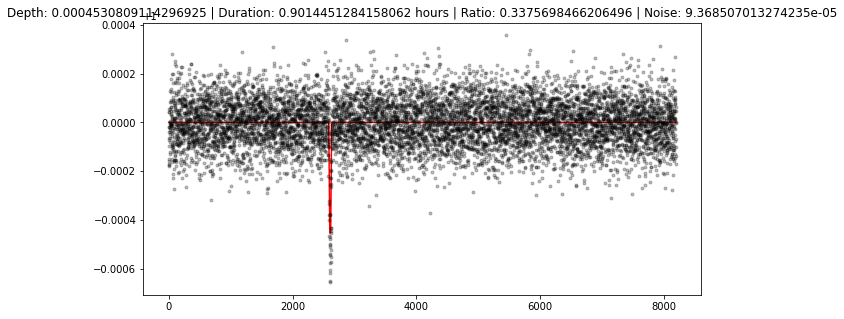

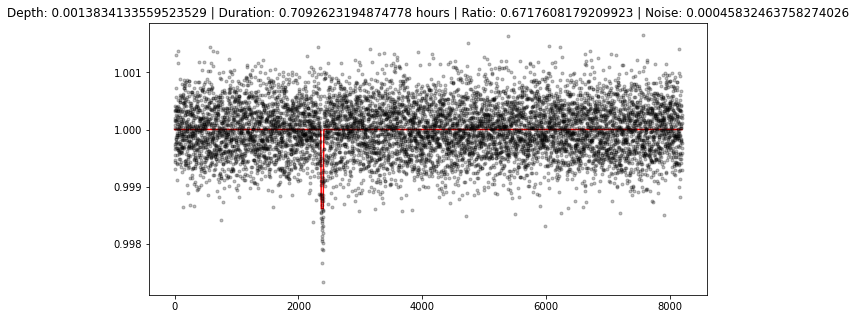

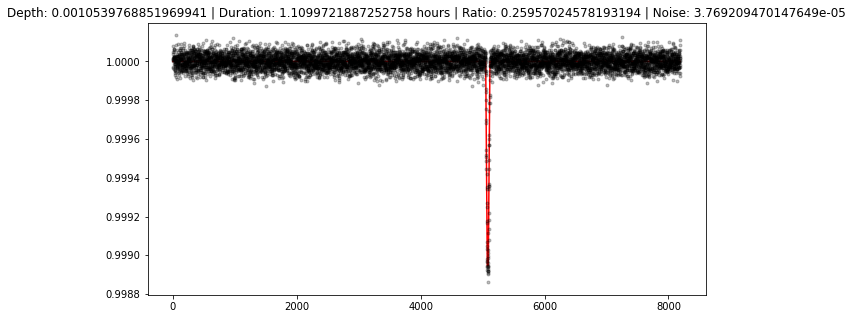

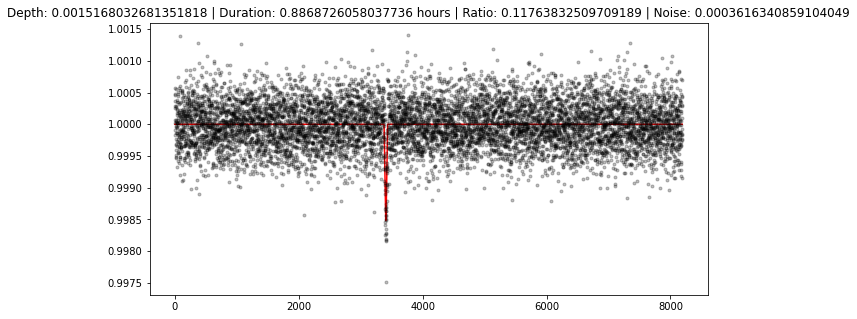

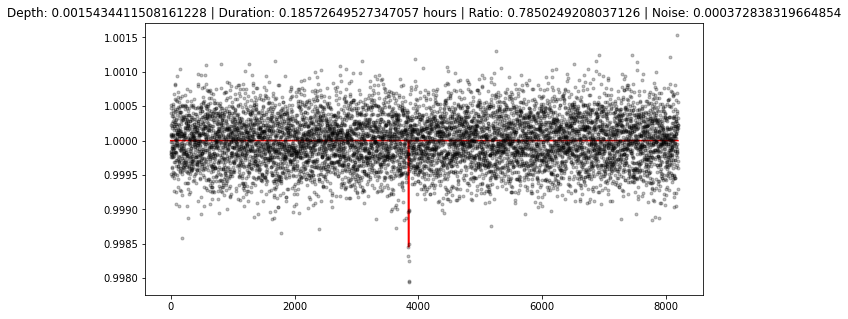

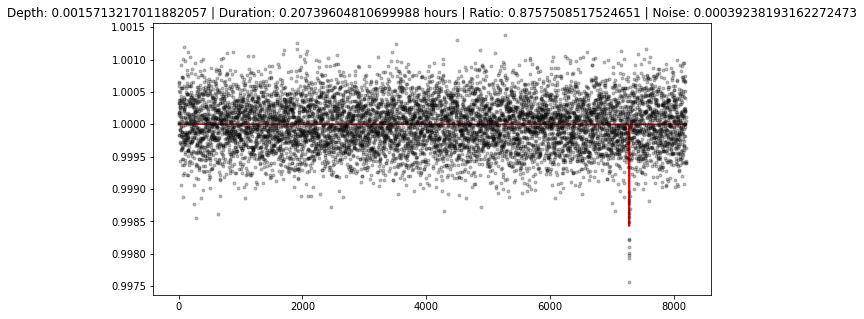

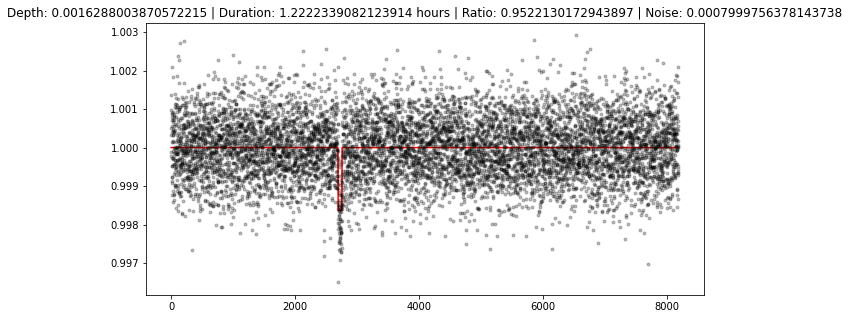

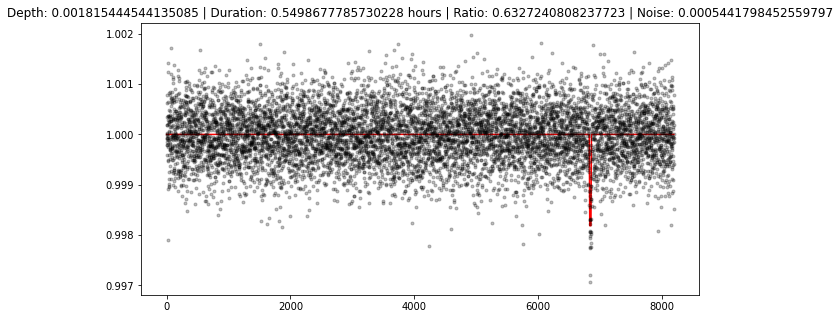

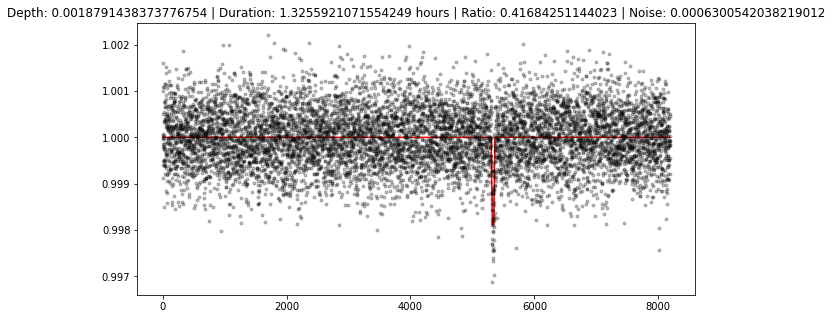

In [14]:
for i in range(10):
    noise_lvl_nobin = np.random.uniform(1, 8000) * 1e-6
    
#     p = np.random.uniform(5, 400)
    
#     p = np.random.uniform(60, 400)
    p = np.random.uniform(100, 200)

    d = np.random.uniform(0.000415, 0.0083) * p
#     d = np.random.uniform(0.0007, 0.01) * p
#     d = np.random.uniform(0.01, 0.08) * p
    
    noise_lvl = noise_lvl_nobin / (1500 / p)
#     noise_lvl = np.random.uniform(1, 800) * 1e-6
    
    min_de = noise_lvl * 1e6 * np.random.randint(3, 7)
    
    de = np.random.uniform(min_de, 1500) * 1e-6

    ratio = np.random.uniform(0.1, 1.0)
    
    time = np.linspace(-p/2, p/2, 8192)
    
    transits_clean = mk_transit(d, de, ratio, time)
    
    transits = transits_clean + np.random.normal(0.0, noise_lvl, len(time))
   

    plt.figure(figsize=(10, 5))

    plt.plot(transits_clean, '-r')
    plt.plot(transits, '.k', alpha=0.25)
#         plt.plot(time, transits[i], '.k')
#         plt.plot(time, transits_clean[i, :], '.-r', alpha = 0.3) 
    plt.title("Depth: " + str(de) + " | Duration: " + str(d) + " hours | Ratio: " + str(ratio) + " | Noise: " + str(noise_lvl)) 
#     plt.savefig('/media/rd3/cchen/cchen/kepler_ml_v3/training_figs/oct25/pos/' + str(i)+'.png')
    plt.show()
#         plt.close()
    

In [16]:
# n = 1000000 # How many true samples
n = 300000
# n = 1000
# n =100

transits_clean = np.zeros((n, 8192))
transits = np.zeros((n, 8192))
params = np.zeros((n, 5))

durs = np.zeros(n)
pers = np.zeros(n)
depths = np.zeros(n)
noise_lvl = np.zeros(n)
ratio = np.zeros(n)


for i in range(n):
    
    if np.mod(i, 100000) == 0:
        
        print(i)
    
    noise_lvl_nobin = np.random.uniform(1, 8000) * 1e-6
    
#     p = np.random.uniform(5, 400)
    
#     p = np.random.uniform(60, 400)
    p = np.random.uniform(100, 200)

    d = np.random.uniform(0.000415, 0.0083) * p
#     d = np.random.uniform(0.001, 0.01) * p
#     d = np.random.uniform(0.01, 0.08) * p
    
    noise_lvl = noise_lvl_nobin / (1500 / p)
#     noise_lvl = np.random.uniform(1, 800) * 1e-6
    
    min_de = noise_lvl * 1e6 * np.random.randint(3, 7)
    
    de = np.random.uniform(min_de, 1500) * 1e-6

    ratio = np.random.uniform(0.1, 1.0)
    
    time = np.linspace(-p/2, p/2, 8192)
    
    transits_clean[i, :] = mk_transit(d, de, ratio, time)
    
    transits[i, :] = transits_clean[i, :] + np.random.normal(0.0, noise_lvl, len(time))
    
    params[i, :] = [p, d, de, ratio, noise_lvl]
    
    
#     if np.mod(i, 5) == 0:
#         plt.figure(figsize=(10, 5))
#         plt.plot(time, transits[i, :], '.k')
    if np.mod(i, 2000) == 0:
        plt.figure(figsize=(10, 5))
        plt.plot(transits[i], '.k')
#         plt.plot(time, transits[i], '.k')
#         plt.plot(time, transits_clean[i, :], '.-r', alpha = 0.3) 
        plt.title("Depth: " + str(de) + " | Duration: " + str(d*24) + " hours | Ratio: " + str(ratio) + " | Noise: " + str(noise_lvl)) 
        plt.savefig('/media/rd3/cchen/cchen/kepler_ml_v3/training_figs/nov7/pos/' + str(i)+'.png')
#         plt.show()
        plt.close()
    
    
#     plt.figure()
#     plt.title(str(params[i, :]))
#     plt.plot(time, transits[i, :], '.k')
#     plt.plot(time, transits_clean[i, :], '-m', alpha=0.1)

0
100000
200000


In [ ]:
params.shape

In [ ]:
print(np.min(params[:, 4]), np.max(params[:, 4]))

In [18]:
n = 300000 # How many false samples
# n = 1000 # How many false samples

neg = np.zeros((n, 8192))

for i in range(n):
    
    if np.mod(i, 100000) == 0:
        
        print(i)
    
    noise_lvl = np.random.uniform(1, 2100) * 1e-6

    neg[i, :] = 1.0 + np.random.normal(0.0, noise_lvl, 8192)
    
    if np.mod(i, 2000) == 0:
        plt.figure(figsize=(10, 5))
        plt.plot(neg[i], '.k')
    #         plt.plot(time, transits[i], '.k')
    #         plt.plot(time, transits_clean[i, :], '.-r', alpha = 0.3) 
        plt.title("Noise: " + str(noise_lvl)) 
        plt.savefig('/media/rd3/cchen/cchen/kepler_ml_v3/training_figs/nov7/neg/' + str(i)+'.png')
        plt.close()
#         plt.show()

0
100000
200000


In [19]:
np.savez('training_data/new_training_data_v3', neg=neg, transits_clean=transits_clean, transits=transits, params=params)

In [ ]:
for i in np.random.randint(0, n, 100):
    plt.figure(figsize = (2,4))
    plt.plot(transits[i])
    

<ipython-input-22-0f6b8145488e>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


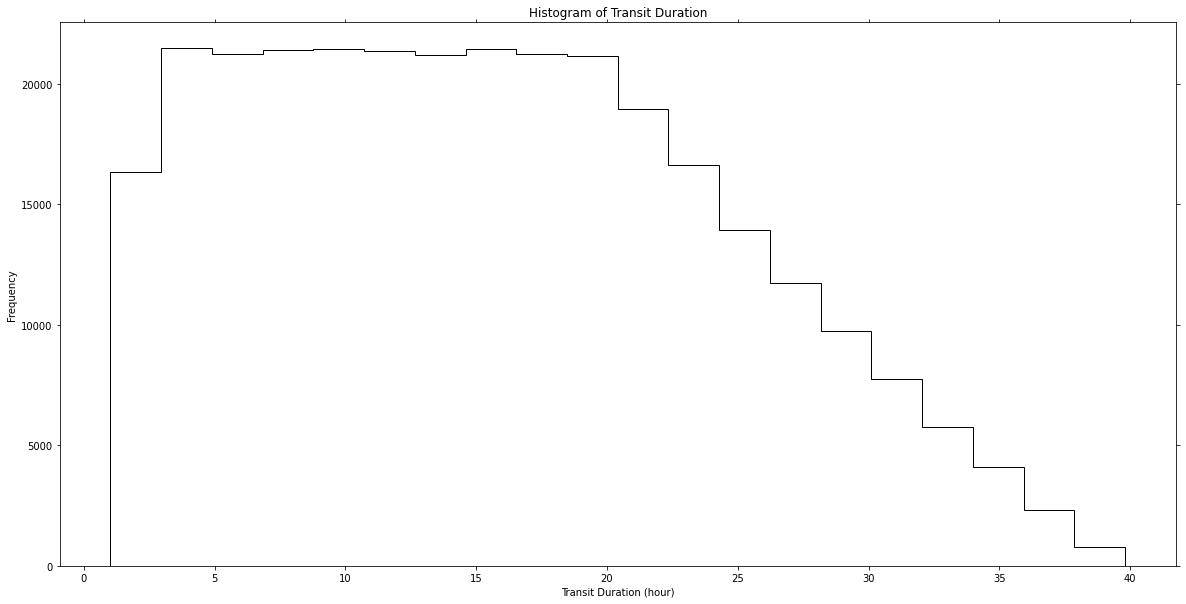

0.042390597719032364 1.658409603619721


In [22]:
plt.figure(figsize=(20, 10))
plt.hist(params[:, 1]*24.0, bins = 20, histtype = 'step', color = 'k')
ax = plt.axes()
# ax.xaxis.set_major_locator(MultipleLocator(1000))
# ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.tick_params(bottom=True, top=True, left=True, right=True, which="both")
plt.xlabel("Transit Duration (hour)")
plt.ylabel("Frequency")
plt.title("Histogram of Transit Duration")
plt.show()
print(np.min(params[:, 1]), np.max(params[:, 1]))

<ipython-input-21-744e4a31e10d>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


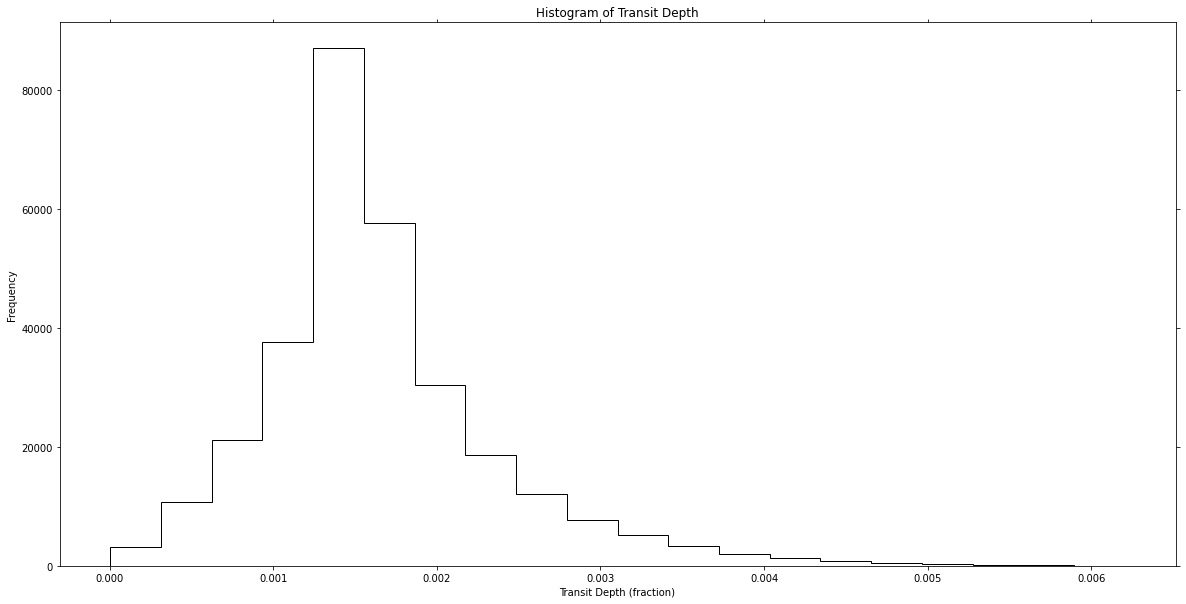

3.20368848783602e-06 0.0062056213909556625


In [21]:
plt.figure(figsize=(20, 10))
plt.hist(params[:, 2], bins = 20, histtype = 'step', color = 'k')
ax = plt.axes()
# ax.xaxis.set_major_locator(MultipleLocator(1000))
# ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.tick_params(bottom=True, top=True, left=True, right=True, which="both")
plt.xlabel("Transit Depth (fraction)")
plt.ylabel("Frequency")
plt.title("Histogram of Transit Depth")
plt.show()
print(np.min(params[:, 2]), np.max(params[:, 2]))

In [2]:
import pandas as pd

table = pd.read_excel('hsp_cumulative_2.xlsx')

all_period_catalog = table['period (d)'][:]



<ipython-input-7-157dcd8ba2e6>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


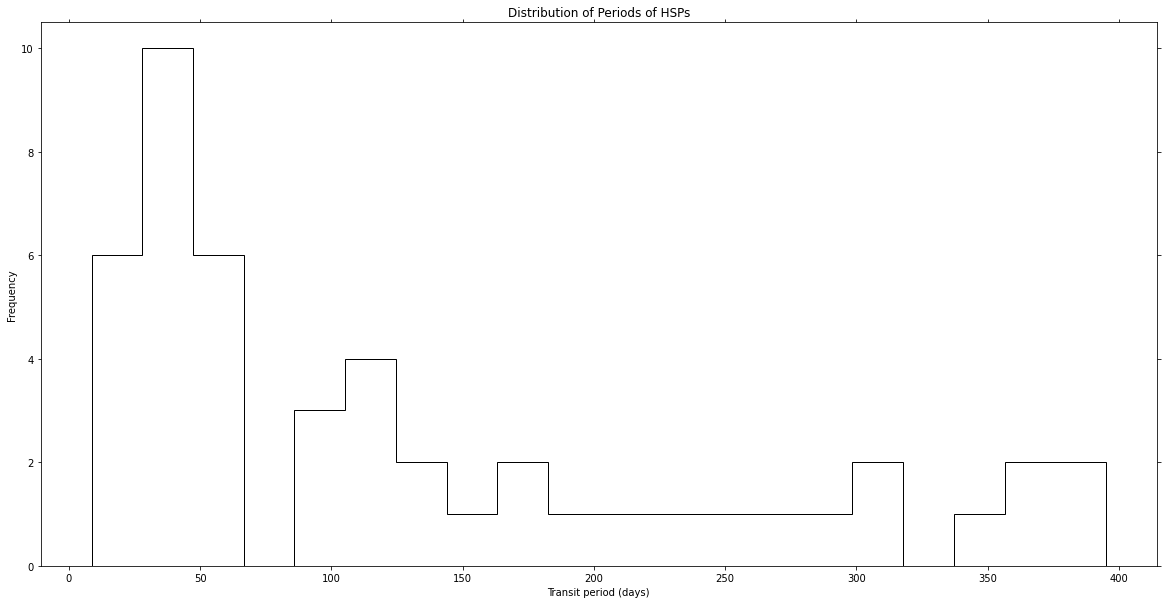

8.68909 395.1314


In [7]:
plt.figure(figsize=(20, 10))
plt.hist(all_period_catalog, bins = 20, histtype = 'step', color = 'k')
ax = plt.axes()
# ax.xaxis.set_major_locator(MultipleLocator(1000))
# ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.tick_params(bottom=True, top=True, left=True, right=True, which="both")
plt.xlabel("Transit period (days)")
plt.ylabel("Frequency")
plt.title("Distribution of Periods of HSPs")
plt.show()
print(np.min(all_period_catalog), np.max(all_period_catalog))